## HW 1/1

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams # detailed parameter setting
""" more details on customization: https://matplotlib.org/stable/tutorials/introductory/customizing.html """
from typing import Dict, List, Union


# some type hints in the header of the function
def my_plotter(x: List[float], y: Union[List[float], List[List[float]]], layout: Dict = {},\
               setup: Dict = {'legsize': 16, 'titlesize': 20, 'titlepad': 30, 'labelsize': 16, 'labelpad': 20},\
               names: List[str] = None):
    """ inline for loop is called 'list comprehension' """
    y = [y] if all(isinstance(item, float) for item in y) else y
    plt.figure(figsize=(8, 4))
    lines = []
    show_legend = False

    """ setup some basic key-word arguments for plot line """
    plot_kwargs = {
        'linestyle': 'solid',
        'linewidth': 4
    }
    if names is not None:
        show_legend = True
        if len(names) != len(y):
            raise ValueError("Length of names is not matching with number of plotted y lists.")

    """ 'enumerate' add a counter to the loop """
    for i, y_item in enumerate(y):
        if show_legend:
            plot_kwargs['label'] = names[i]
        _line = plt.plot(x, y_item, **plot_kwargs)
        lines.append(_line)

    if show_legend:
        plt.legend(fontsize=setup['legsize'])
    if 'title' in layout:
        plt.title(layout['title'], fontsize=setup['titlesize'])
        rcParams['axes.titlepad'] = setup['titlepad'] # moving the title a little further away from the plot
    if 'x_label' in layout:
        plt.xlabel(layout['x_label'], fontsize=setup['labelsize'])
        rcParams['axes.labelpad'] = setup['labelpad'] # moving the ax label a little further away from the plot
    if 'y_label' in layout:
        plt.ylabel(layout['y_label'], fontsize=setup['labelsize'])
        rcParams['axes.labelpad'] = setup['labelpad'] # moving the ax label a little further away from the plot

    """ enhance axes """
    ax = plt.gca() # gca: get current axes
    ax.axhline(linestyle='--', color='black', linewidth=1)
    plt.show()


## HW 1/2

In [2]:
import numpy as np
from scipy.stats import norm


"""The pricing function of European call option"""
def black_scholes_eur_call(mode: str,r: float, T: float, S: Union[float, List[float]], sigma: float,\
                           K: Union[float, List[float]]):
    """
    Black-Scholes pricer of European call option on non-dividend-paying stock

    param r: risk-free interest rate (which is constant)
    param T: time to maturity (in years)
    param S: spot price of the underlying stock
    param sigma: volatility of the underlying stock
    param K: strike price (or prices)
    """
    # check conditions
    assert sigma > 0
    if K is float and S is float:
        raise ValueError("Incorrect usage of spot and strike price.")

    K = np.array([K]) if isinstance(K, float) else np.array(K)
    S = np.array([S]) if isinstance(S, float) else np.array(S)

    d1_vec = ( np.log( S / K ) + ( r + 0.5 * sigma**2 ) * T ) / ( sigma * T**0.5 )
    d2_vec = d1_vec - sigma * T**0.5

    N_d1_vec = norm.cdf(d1_vec)
    N_d2_vec = norm.cdf(d2_vec)

    if mode == 'price':
        return N_d1_vec * S - K * np.exp((-1.0)*r*T) * N_d2_vec
    if mode == 'delta':
        return N_d1_vec
    if mode == 'vega':
        return 1 / (2*np.pi) * np.exp(-1/2 * d1_vec**2) * S * np.sqrt(T)
    if mode == 'theta':
        return 1 / (2*np.pi) * np.exp(-1/2 * d1_vec**2) * (-S) * sigma / (2*np.sqrt(T))-\
    r * K * np.exp(-r*T) * N_d2_vec
    if mode == 'rho':
        return K * T * np.exp(-r*T) * N_d2_vec
    if mode == 'gamma':
        return 1 / (2*np.pi) * np.exp(-1/2 * d1_vec**2)  / (S * sigma * np.sqrt(T))

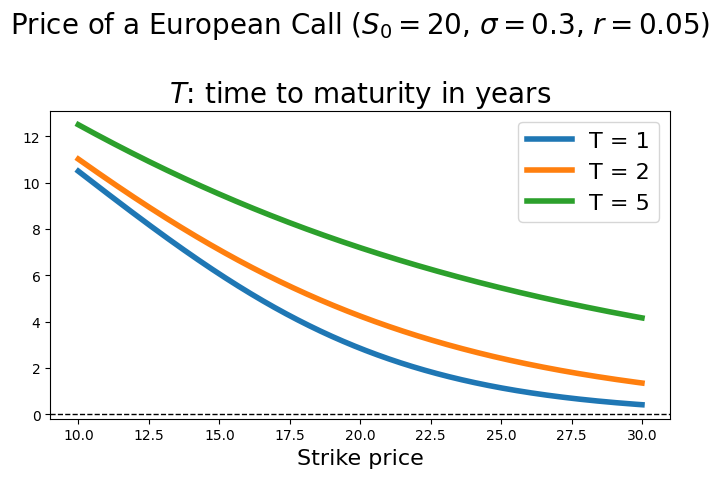

In [3]:
# strike prices for which the option price is calculated
K_vec = np.arange(10, 30, 0.01)
# time to maturities (in year fractions)
T_vec = [1.0, 2.0, 5.0]

prices_to_plot = []
for _T in T_vec:
    prices_to_plot.append(
        black_scholes_eur_call(mode = 'price',r = 0.05, T = _T, S = 20.0 , sigma = 0.3, K = K_vec)
    )

layout = {
    'title': 'Price of a European Call ($S_0 = 20$, $\sigma = 0.3$, $r = 0.05$)\n\n$T$: time to maturity in years',
    'x_label': 'Strike price'
}
my_plotter(K_vec, prices_to_plot, layout=layout, names=[f'T = {int(item)}' for item in T_vec])


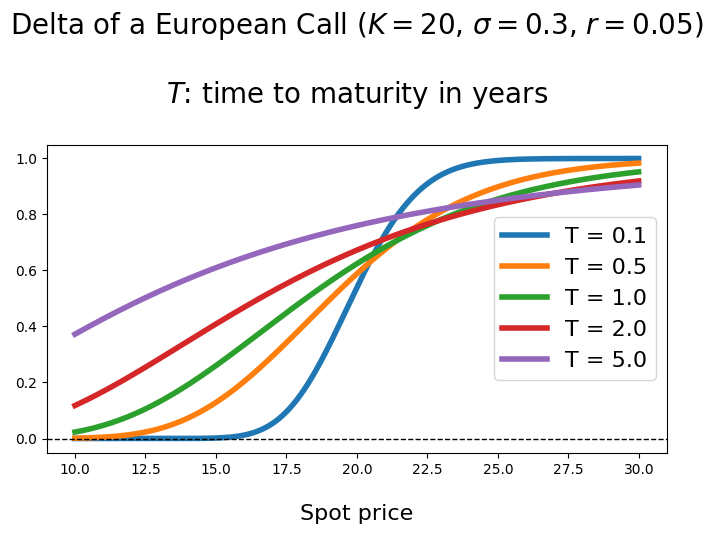

In [4]:
# strike prices for which the option price is calculated
S_vec = np.arange(10, 30, 0.01)
# time to maturities (in year fractions)
T_vec = [0.1,0.5,1.0, 2.0, 5.0]

prices_to_plot = []
for _T in T_vec:
    prices_to_plot.append(
        black_scholes_eur_call(mode = 'delta',r = 0.05, T = _T, S = S_vec , sigma = 0.3, K = 20)
    )

layout = {
    'title': 'Delta of a European Call ($K = 20$, $\sigma = 0.3$, $r = 0.05$)\n\n$T$: time to maturity in years',
    'x_label': 'Spot price'
}
my_plotter(S_vec, prices_to_plot, layout=layout, names=[f'T = {item}' for item in T_vec])


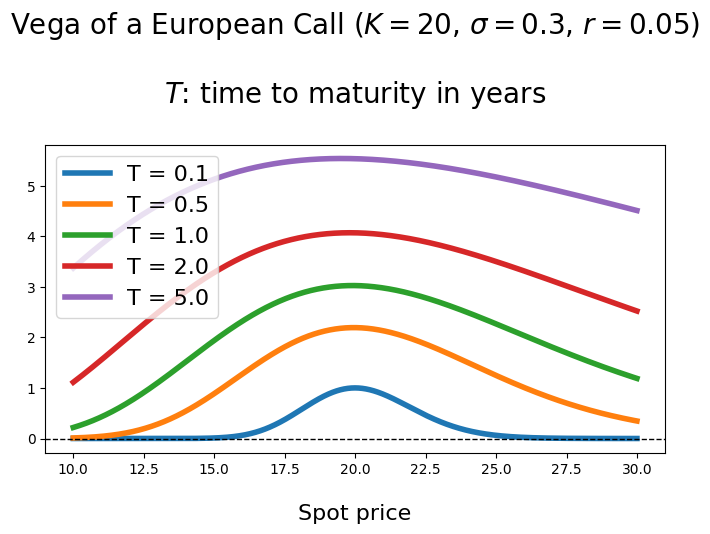

In [5]:
# strike prices for which the option price is calculated
S_vec = np.arange(10, 30, 0.01)
# time to maturities (in year fractions)
T_vec = [0.1,0.5,1.0, 2.0, 5.0]

prices_to_plot = []
for _T in T_vec:
    prices_to_plot.append(
        black_scholes_eur_call(mode = 'vega',r = 0.05, T = _T, S = S_vec , sigma = 0.3, K = 20.)
    )

layout = {
    'title': 'Vega of a European Call ($K = 20$, $\sigma = 0.3$, $r = 0.05$)\n\n$T$: time to maturity in years',
    'x_label': 'Spot price'
}
my_plotter(S_vec, prices_to_plot, layout=layout, names=[f'T = {item}' for item in T_vec])

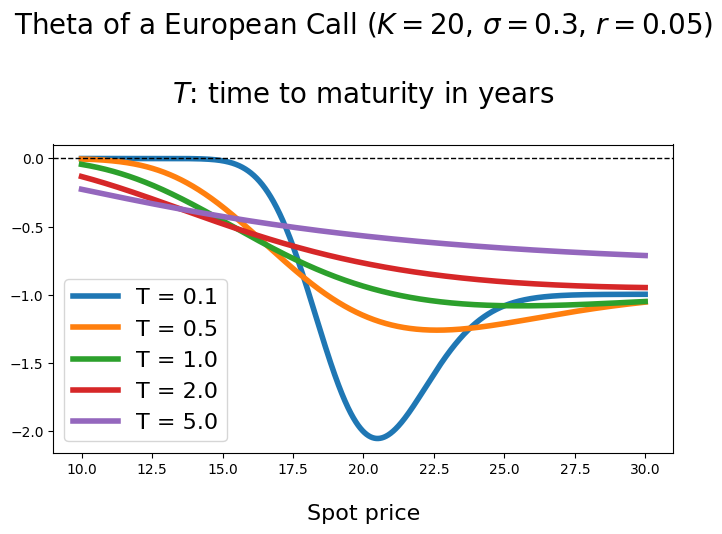

In [6]:
# strike prices for which the option price is calculated
S_vec = np.arange(10, 30, 0.01)
# time to maturities (in year fractions)
T_vec = [0.1,0.5,1.0, 2.0, 5.0]

prices_to_plot = []
for _T in T_vec:
    prices_to_plot.append(
        black_scholes_eur_call(mode = 'theta',r = 0.05, T = _T, S = S_vec , sigma = 0.3, K = 20.)
    )

layout = {
    'title': 'Theta of a European Call ($K = 20$, $\sigma = 0.3$, $r = 0.05$)\n\n$T$: time to maturity in years',
    'x_label': 'Spot price'
}
my_plotter(S_vec, prices_to_plot, layout=layout, names=[f'T = {item}' for item in T_vec])

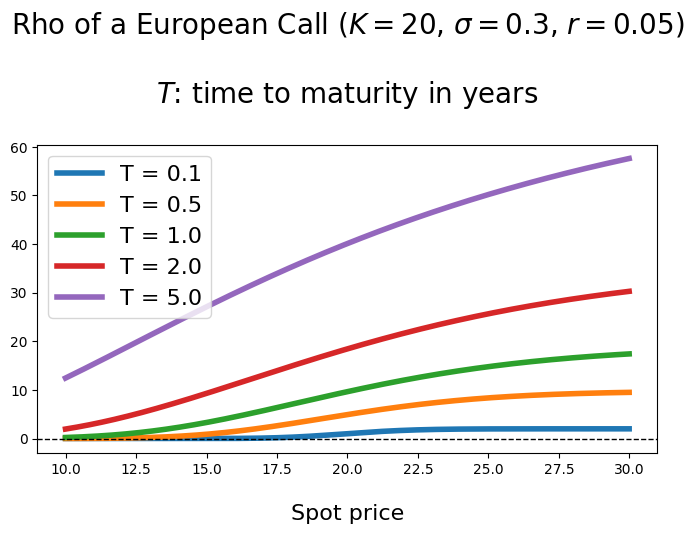

In [7]:
# strike prices for which the option price is calculated
S_vec = np.arange(10, 30, 0.01)
# time to maturities (in year fractions)
T_vec = [0.1,0.5,1.0, 2.0, 5.0]

prices_to_plot = []
for _T in T_vec:
    prices_to_plot.append(
        black_scholes_eur_call(mode = 'rho',r = 0.05, T = _T, S = S_vec , sigma = 0.3, K = 20.)
    )

layout = {
    'title': 'Rho of a European Call ($K = 20$, $\sigma = 0.3$, $r = 0.05$)\n\n$T$: time to maturity in years',
    'x_label': 'Spot price'
}
my_plotter(S_vec, prices_to_plot, layout=layout, names=[f'T = {item}' for item in T_vec])

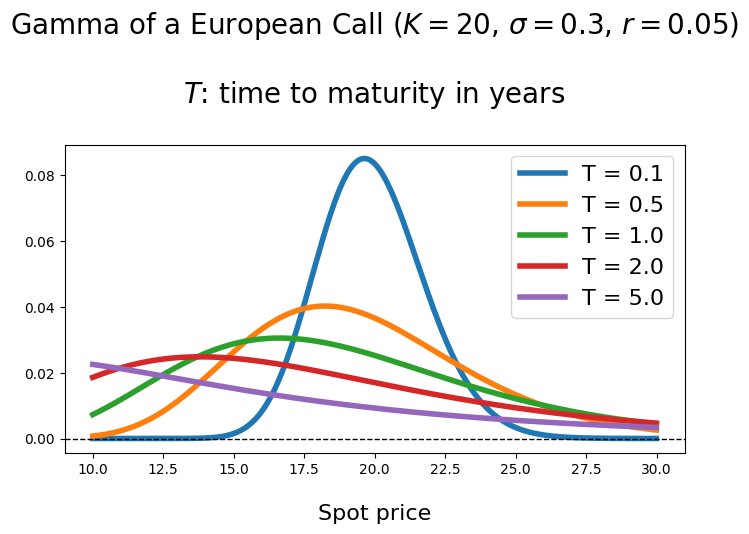

In [8]:
# strike prices for which the option price is calculated
S_vec = np.arange(10, 30, 0.01)
# time to maturities (in year fractions)
T_vec = [0.1,0.5,1.0, 2.0, 5.0]

prices_to_plot = []
for _T in T_vec:
    prices_to_plot.append(
        black_scholes_eur_call(mode = 'gamma',r = 0.05, T = _T, S = S_vec , sigma = 0.3, K = 20.)
    )

layout = {
    'title': 'Gamma of a European Call ($K = 20$, $\sigma = 0.3$, $r = 0.05$)\n\n$T$: time to maturity in years',
    'x_label': 'Spot price'
}
my_plotter(S_vec, prices_to_plot, layout=layout, names=[f'T = {item}' for item in T_vec])

## HW 1/3

In [9]:
"""The pricing function of European put option"""
def black_scholes_eur_put(r: float, T: float, S: Union[float, List[float]], sigma: float,\
                          K: Union[float, List[float]]):
    """
    Black-Scholes pricer of European call option on non-dividend-paying stock

    param r: risk-free interest rate (which is constant)
    param T: time to maturity (in years)
    param S: spot price of the underlying stock
    param sigma: volatility of the underlying stock
    param K: strike price (or prices)
    """
    # check conditions
    assert sigma > 0

    K = np.array([K]) if isinstance(K, float) else np.array(K)
    S = np.array([S]) if isinstance(S, float) else np.array(S)


    d1_vec = ( np.log( S / K ) + ( r + 0.5 * sigma**2 ) * T ) / ( sigma * T**0.5 )
    d2_vec = d1_vec - sigma * T**0.5

    N_d1_vec = norm.cdf(-d1_vec)
    N_d2_vec = norm.cdf(-d2_vec)

    return  K * np.exp((-1.0)*r*T) * N_d2_vec - N_d1_vec * S


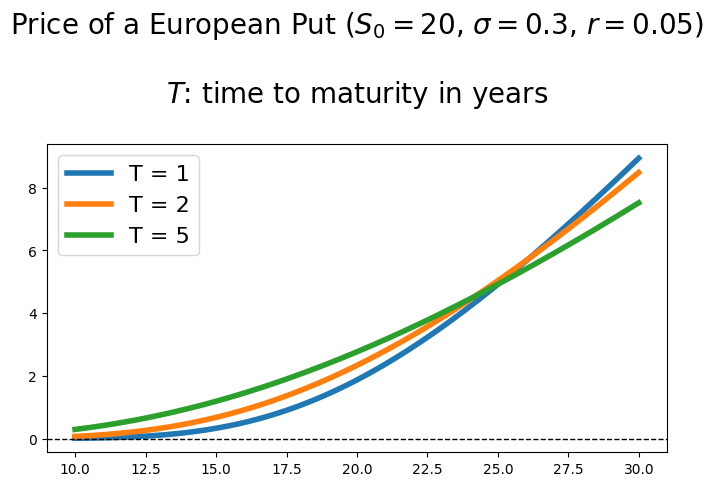

In [10]:
# strike prices for which the option price is calculated
K_vec = np.arange(10, 30, 0.01)
# time to maturities (in year fractions)
T_vec = [1.0, 2.0, 5.0]

prices_to_plot = []
for _T in T_vec:
    prices_to_plot.append(
        black_scholes_eur_put(r = 0.05, T = _T, S = 20.0 , sigma = 0.3, K = K_vec)
    )

layout = {
    'title': 'Price of a European Put ($S_0 = 20$, $\sigma = 0.3$, $r = 0.05$)\n\n$T$: time to maturity in years'
}
my_plotter(K_vec, prices_to_plot, layout=layout, names=[f'T = {int(item)}' for item in T_vec])


## HW 1/4

In [11]:
def put_call_parity(r: float, T: float, S: Union[float, List[float]], sigma: float,\
                          K: Union[float, List[float]]):
    return black_scholes_eur_call('price', r, T, S, sigma, K) - black_scholes_eur_put(r, T, S, sigma, K)

def long_forward_payoff(r: float, T: float, S: Union[float, List[float]], sigma: float,\
                          K: Union[float, List[float]]):
    
    K = np.array([K]) if isinstance(K, float) else np.array(K)
    S = np.array([S]) if isinstance(S, float) else np.array(S)
    
    return S - K * np.exp((-1.0)*r*T)

/var/folders/15/w67zcm4949j6kcp2w6kcl8n40000gn/T/ipykernel_74665/1360037553.py:25: RuntimeWarning: divide by zero encountered in divide
  d1_vec = ( np.log( S / K ) + ( r + 0.5 * sigma**2 ) * T ) / ( sigma * T**0.5 )
/var/folders/15/w67zcm4949j6kcp2w6kcl8n40000gn/T/ipykernel_74665/381923113.py:20: RuntimeWarning: divide by zero encountered in divide
  d1_vec = ( np.log( S / K ) + ( r + 0.5 * sigma**2 ) * T ) / ( sigma * T**0.5 )


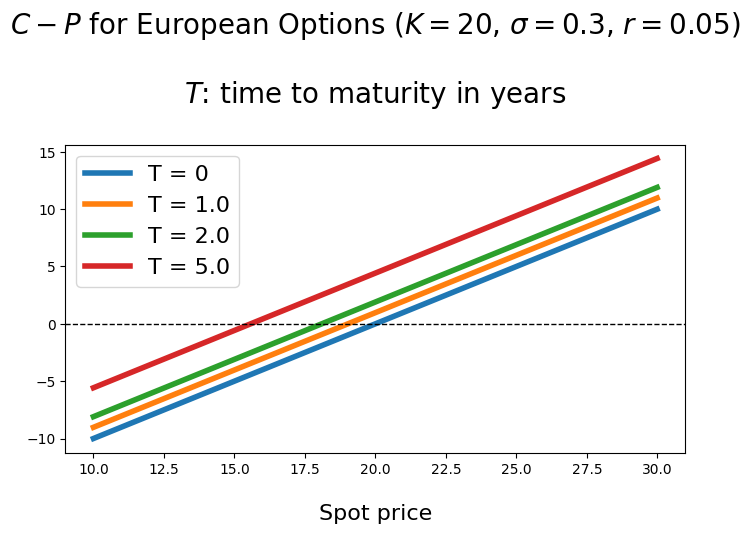

In [12]:
# strike prices for which the option price is calculated
S_vec = np.arange(10, 30, 0.01)
# time to maturities (in year fractions)
T_vec = [0,1.0, 2.0, 5.0]

prices_to_plot = []
for _T in T_vec:
    prices_to_plot.append(
        put_call_parity(r = 0.05, T = _T, S = S_vec , sigma = 0.3, K = 20.)
    )

layout = {
    'title': '$C-P$ for European Options ($K = 20$, $\sigma = 0.3$, $r = 0.05$)\n\n$T$: time to maturity in years',
    'x_label': 'Spot price'
}
my_plotter(S_vec, prices_to_plot, layout=layout, names=[f'T = {item}' for item in T_vec])

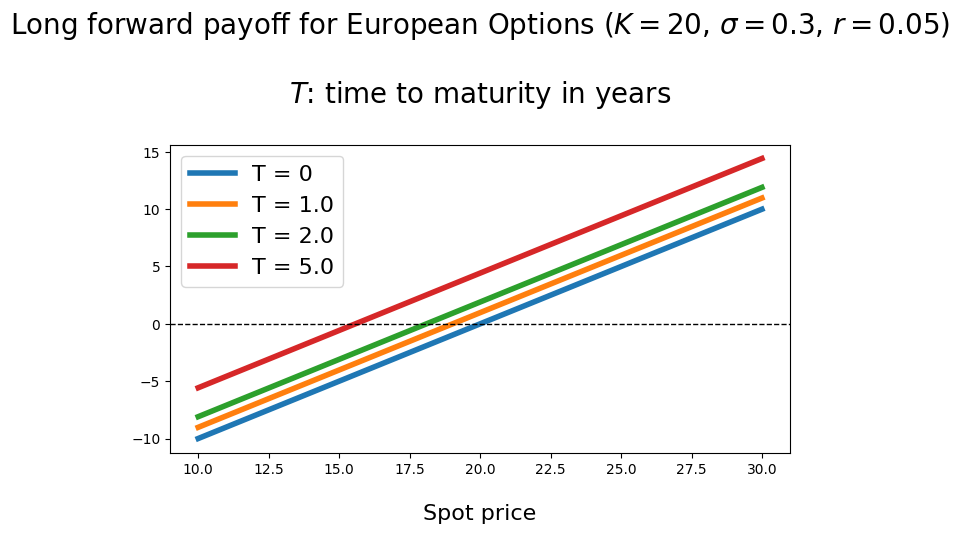

In [13]:
# strike prices for which the option price is calculated
S_vec = np.arange(10, 30, 0.01)
# time to maturities (in year fractions)
T_vec = [0,1.0, 2.0, 5.0]

prices_to_plot = []
for _T in T_vec:
    prices_to_plot.append(
        long_forward_payoff(r = 0.05, T = _T, S = S_vec , sigma = 0.3, K = 20.)
    )

layout = {
    'title': 'Long forward payoff for European Options ($K = 20$, $\sigma = 0.3$, $r = 0.05$)\n\n$T$: time to maturity in years',
    'x_label': 'Spot price'
}
my_plotter(S_vec, prices_to_plot, layout=layout, names=[f'T = {item}' for item in T_vec])